# HW3

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from IPython.display import display
from numpy import linalg as LA
from scipy.stats import multivariate_normal

## Problem 1 (K-means)

Implement the K-means algorithm discussed in class. Generate 500 observations from a mixture of three Gaussians on R2 with mixing weights π= [0.2,0.5,0.3]and means μ and covariances Σ

Genearate data: use np.random.multivariate_normal do draw random samples from a multivariate normal distribution.

In [ ]:
mu1 = np.array([0,0])
mu2 = np.array([3,0])
mu3 = np.array([0,3])
cov = np.matrix([[1,0],[0,1]])
gaussdata1 = np.random.multivariate_normal(mu1,cov,500)
gaussdata2 = np.random.multivariate_normal(mu2,cov,500)
gaussdata3 = np.random.multivariate_normal(mu3,cov,500)

Generate cluster label given probability distribution

In [ ]:
cluster_label = np.random.choice(range(3), size=500, p=[0.2,0.5,0.3])

In [ ]:
data = np.concatenate((gaussdata1[cluster_label==0,:],
                       gaussdata2[cluster_label==1,:],
                       gaussdata3[cluster_label==2,:] ))

In [ ]:
data.shape

#### a)  For K= 2,3,4,5, plot the value of the K-means objective function per iteration for 20 iterations (the algorithm may converge before that).

In [ ]:
def Kmeans(start_lst, K, iterations, dataset):
    """
    Return cost_lst after implementing K means clustering. cost_lst is a list containg cost function
    after each iteration
    
    @start_lst: initial cluster mean assignment.It's a list of array, each array is a 
    cluster mean, len(start_lst) = K
    @K: K-means
    @iterations: number of iterations
    @dataset: dataset
    """

    cost_lst = []
    for iteration in range(0,iterations):
        #assign xi to closet centroid
        cluster_assignment = [] #use to record cluster assignment, change each iteration
        for i in range(0,500):
            dist_lst = []
            for item in start_lst:
                dist = np.sum((dataset[i] - item)**2)
                dist_lst.append(dist)
                new_cluster = dist_lst.index(min(dist_lst))
            cluster_assignment.append(new_cluster)
        #new cluster
        cluster_data = []
        for index in range(0,K):
            cluster = dataset[np.array(cluster_assignment)==index,:]
            cluster_data.append(cluster) #cluster_data[0] means cluster1
        #update cluster mean and centroid
        cost_count = 0
        new_start = []
        for index2 in range(0,K):
            cost_part = np.sum((cluster_data[index2]-start_lst[index2])**2)
            cost_count += cost_part
            #one_start is updated cluster mean
            one_start = np.average(cluster_data[index2], axis=0)
            new_start.append(one_start) #len(new_start) = K, list of array
        cost_lst.append(cost_count)
        start_lst = new_start

        #new_start = []
        #for index3 in range(0,K):
            #start_part = np.average(cluster_data[index3], axis=0)
            #print(start_part)
            #new_start.append(start_part)
        #print(new_start)
        #start_lst = new_start
    return cost_lst, cluster_data
        


K = 2, 3, 4, 5, set random start

In [ ]:
#random start
random = np.random.randint(0,501,size=5)
start1 = data[random[0]]
start2 = data[random[1]]
start3 = data[random[2]]
start4 = data[random[3]]
start5 = data[random[4]]

In [ ]:
K2 = (start1, start2)
K3 = (start1, start2, start3)
K4 = (start1, start2, start3, start4)
K5 = (start1, start2, start3, start4, start5)

Obtain change of cost function by implementing Kmeans function

In [ ]:
cost_k2, cluster_K2 = Kmeans(K2, 2, 20, data)
cost_k3, cluster_K3 = Kmeans(K3, 3, 20, data)
cost_k4, cluster_K4 = Kmeans(K4, 4, 20, data)
cost_k5, cluster_K5 = Kmeans(K5, 5, 20, data)

In [ ]:
plt.figure(figsize=(8,6))
x_axis = np.arange(1,21)
plt.plot(x_axis,cost_k2,label='K=2')
plt.plot(x_axis,cost_k3,label='K=3')
plt.plot(x_axis,cost_k4,label='K=4')
plt.plot(x_axis,cost_k5,label='K=5')
plt.legend()
plt.xticks(x_axis)
plt.xlabel('iteration')
plt.ylabel('cost function')
plt.title('K-means Clustering: Cost Function By Iterations')

b)  For K= 3,5, plot the 500 data points and indicate the cluster of each for the final iteration by marking it with a color or a symbol.

In [ ]:
plt.figure(figsize=(8,6))

pd_cluster = pd.DataFrame(cluster_K3[0])
x1 = pd_cluster[0].tolist()
y1 = pd_cluster[1].tolist()
plt.scatter(x1,y1, label = "Cluster1")

pd_cluster = pd.DataFrame(cluster_K3[1])
x2 = pd_cluster[0].tolist()
y2 = pd_cluster[1].tolist()
plt.scatter(x2,y2, label = "Cluster2")

pd_cluster = pd.DataFrame(cluster_K3[2])
x3 = pd_cluster[0].tolist()
y3 = pd_cluster[1].tolist()
plt.scatter(x3,y3, label = "Cluster3")

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('K-means Clustering: K=3')

In [ ]:
plt.figure(figsize=(8,6))
pd_cluster = pd.DataFrame(cluster_K5[0])
x1 = pd_cluster[0].tolist()
y1 = pd_cluster[1].tolist()
plt.scatter(x1,y1, label = "Cluster1")
pd_cluster = pd.DataFrame(cluster_K5[1])
x2 = pd_cluster[0].tolist()
y2 = pd_cluster[1].tolist()
plt.scatter(x2,y2, label = "Cluster2")
pd_cluster = pd.DataFrame(cluster_K5[2])
x3 = pd_cluster[0].tolist()
y3 = pd_cluster[1].tolist()
plt.scatter(x3,y3, label = "Cluster3")
pd_cluster = pd.DataFrame(cluster_K5[3])
x4 = pd_cluster[0].tolist()
y4 = pd_cluster[1].tolist()
plt.scatter(x4,y4, label = "Cluster5")
pd_cluster = pd.DataFrame(cluster_K5[4])
x5 = pd_cluster[0].tolist()
y5 = pd_cluster[1].tolist()
plt.scatter(x5,y5, label = "Cluster5")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('K-means Clustering: K=5')

## Problem 2 (Bayes classifier revisited)– 30 points

In this problem, you will implement the EM algorithm for the Gaussian mixture model, with the purposeof using it in a Bayes classifier. The data is a processed version of the spam email data you looked at inHomework 2. Now, each labeled pair(x,y)hasx∈R10. We discussed how the Bayes classifier learnsclass-conditional densities, and unsupervised learning algorithms can be useful here.  In this problem,the class conditional density will be the Gaussian mixture model (GMM). In these experiments, pleaseinitialize  all  covariance  matrices  to  the  empirical  covariance  of  the  data  being  modeled.   Randomlyinitialize the means by sampling from a single multivariate Gaussian where the parameters are the meanand covariance of the data being modeled. Initialize the mixing weights to be uniform.

### a)  Implement the EM algorithm for the GMM described in class.  Using the training data provided,for each class separately, plot the log marginal objective function for a 3-Gaussian mixture modelover 10 different runs and for iterations 5 to 30. There should be two plots, each with 10 curves.

In [4]:
X_train = pd.read_csv('Prob2_Xtrain.csv', header=None)
y_train = pd.read_csv('Prob2_ytrain.csv', header=None)
X_test = pd.read_csv('Prob2_Xtest.csv', header=None)
y_test = pd.read_csv('Prob2_ytest.csv', header=None)

In [6]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.042985,0.402080,0.060133,0.008235,-0.011964,0.017788,0.004096,-0.041283,-0.018114,0.003424
1,-0.021163,0.197970,0.023161,0.000774,-0.000446,0.037280,0.002865,-0.012920,0.027745,-0.013744
2,-0.033537,0.307060,0.048742,0.011210,0.029054,-0.073224,-0.007833,-0.069956,-0.021547,-0.010270
3,-0.033537,0.307060,0.048742,0.011210,0.029054,-0.073224,-0.007833,-0.069956,-0.021547,-0.010270
4,-0.003041,0.028877,-0.000203,-0.003211,-0.005451,0.034991,0.003081,0.005470,0.026079,-0.018609


In [7]:
train_combined = pd.concat([X_train, y_train], axis=1, sort=False)

In [8]:
train_1 = train_combined[train_combined.iloc[:,-1]==1]
train_0 = train_combined[train_combined.iloc[:,-1]==0]

Split X and y

In [9]:
X_train_1 = train_1.iloc[:,0:10]
X_train_0 = train_0.iloc[:,0:10]
y_train_1 = train_1.iloc[:,-1]
y_train_0 = train_0.iloc[:,-1]

Initialization Example

Initialize covariance matrices to  the empirical covariance of the data being modeleled.

In [ ]:
init_cov_ind = np.cov(X_train_1.transpose())
init_cov_ind.shape

In [ ]:
init_cov  = np.array([init_cov_ind,init_cov_ind,init_cov_ind])
init_cov.shape

Initialize means by sampling from a single multivariate Gaussian where parameters  are  the  mean and covariance of the data  being modeled.

In [ ]:
data_mean = np.array(X_train_1.describe().loc['mean',:])
data_mean

In [ ]:
init_mean1 = np.random.multivariate_normal(data_mean, init_cov[0])
init_mean2 = np.random.multivariate_normal(data_mean, init_cov[0])
init_mean3 = np.random.multivariate_normal(data_mean, init_cov[0])
all_init_mean = np.array([init_mean1,init_mean2,init_mean3])
all_init_mean.shape

Initialize weights

In [ ]:
pi_weight = np.ones(3)*np.array(1/3)
pi_weight

Write a General Function to implement EM for the GMM

In [10]:
def EM_GMM(data, K, num_ite):
    """
    Return list that contains change of objective function per iteration.
    
    @data: dataset
    @K: num of clusters
    @num_ite: number of iterations
    """
    #initialize covariance as empirical covariance
    init_cov_ind = np.cov(data.transpose()) #shape:10*10
    #init_cov  = np.array([init_cov_ind,init_cov_ind,init_cov_ind]) #shape: (3,10,10)
    init_cov = np.array([init_cov_ind]*K)
    
    #initialize mean from gaussian
    data_mean = np.array(data.describe().loc['mean',:])
    #init_mean1 = np.random.multivariate_normal(data_mean, init_cov[0],K)
    #init_mean2 = np.random.multivariate_normal(data_mean, init_cov[0])
    #init_mean3 = np.random.multivariate_normal(data_mean, init_cov[0]) #shape: 1*10
    #all_init_mean = np.array([init_mean1,init_mean2,init_mean3]) #shape:3*10
    all_init_mean = np.random.multivariate_normal(data_mean, init_cov[0],K)
    
    #initialize weight as uniform
    pi_weight = np.ones(K)*np.array(1/K)
    n = data.shape[0]
    
    #EM Algorithm
    #E Step
    obj_acc = []
    #weight = []
    for i in range(0,num_ite):
        #update phi
        phi_bottom = 0
        phi = [0] * K
        for i in range(0, K):
            phi_bottom = multivariate_normal.pdf(data,mean=all_init_mean[i], cov=init_cov[i], 
                                                  allow_singular=True)*pi_weight[i] + phi_bottom
        # E step: update phi
        for i in range(0, K): #shape:(1631,)
            phi[i] = pi_weight[i]*multivariate_normal.pdf(data,mean=all_init_mean[i], 
                                                          cov=init_cov[i], allow_singular=True)/phi_bottom 
        #M Step
        nk = np.zeros(K) #1*k array
        for i in range(0,K):
            pi_k = np.zeros(K)
            nk[i] = np.sum(phi[i])
            pi_weight[i] = nk[i]/n
        #pi_weight = nk/n
 
        #update mu
        for i in range(0,K): #3*
            all_init_mean[i] = (1/nk[i])*np.matmul(np.matrix(phi[i].reshape(1,-1)), np.matrix(data))

        #update cov
        x_mu1 = np.array(data)-all_init_mean[i] #xi-uk term
        init_cov[i] = np.matmul(np.multiply(phi[i].reshape(-1,1), x_mu1).transpose(),x_mu1)/nk[i]

        #update cost function
        obj_one = np.sum(np.log(phi_bottom))
        obj_acc.append(obj_one)
    
    return obj_acc, pi_weight, all_init_mean, init_cov


In [11]:
obj_acc, pi_weight, all_init_mean, init_cov = EM_GMM(X_train_1, 5, 30)

In [12]:
def implement_GMM_plot(data, K, num_ite, n_times):
    """
    Implement GMM algorithm n times and return a plot.
    
    @n_times: n times
    """
    obj_acc_all = []
    pi_k_all = []
    all_init_mean_all = []
    init_cov_all = []
    for i in range(0, n_times):
        obj_acc, pi_weight, all_init_mean, init_cov = EM_GMM(data, K, num_ite)
        obj_acc_all.append(obj_acc)
        pi_k_all.append(pi_weight)
        all_init_mean_all.append(all_init_mean)
        init_cov_all.append(init_cov)
    
    x_axis = np.arange(5,31)
    i=0
    plt.figure(figsize=(8,6))
    for item in obj_acc_all:
        item = item[4:]
        plt.plot(x_axis, item, label=i)
        i+=1
        plt.legend()
        #plt.title('Log Marginal Objective Function by Iterations')
        plt.xlabel('iterations')
        plt.ylabel('Log Marginal Objective Function')
    return obj_acc_all, pi_k_all, all_init_mean_all,init_cov_all
    

Text(0.5, 1.0, 'Class1: Log Marginal Objective Function by Iterations')

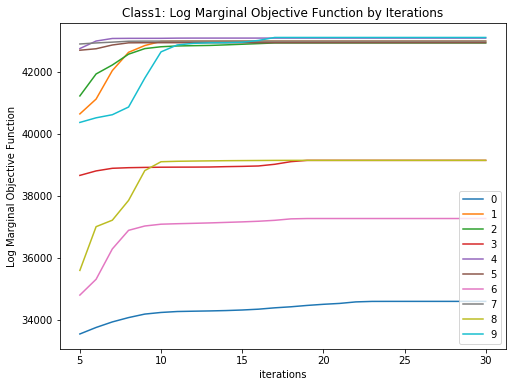

In [13]:
obj_acc_all_1, pi_weight_1, all_init_mean_all_1,init_cov_all_1 = \
    implement_GMM_plot(X_train_1, 3, 30,10)
plt.title('Class1: Log Marginal Objective Function by Iterations')

**Class 0**

Text(0.5, 1.0, 'Class0: Log Marginal Objective Function by Iterations')

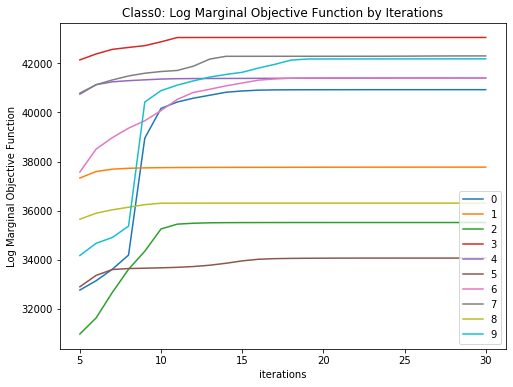

In [14]:
obj_acc_all_0, pi_weight_0, all_init_mean_all_0,init_cov_all_0 = \
    implement_GMM_plot(X_train_0, 3, 30,10)
plt.title('Class0: Log Marginal Objective Function by Iterations')

#### b)  Using the best run for each class after 30 iterations, predict the testing data using a Bayes classifier and show the result in a 2×2 confusion matrix,  along with the accuracy percentage. Repeat this process for a 1-, 2-, 3- and 4-Gaussian mixture model. Show all results nearby each other,and don’t repeat Part (a) for these other cases. Note that a 1-Gaussian GMM doesn’t require an algorithm, although your implementation will likely still work in this case.

#### 3- Gaussian Mixture Model

In [ ]:
def find_largest_objective(obj_acc_all_lst):
    """
    Return index of iteration that has largest log marginal likelihood (best run).
    """
    i = 0
    acc = []
    for item in obj_acc_all_lst:
        acc.append(item[-1])
        m = max(acc)
        index_part = [i for i, j in enumerate(acc) if j == m]
        max_index = index_part[0]
    return max_index

**Class 1**

In [ ]:
ind_1 = find_largest_objective(obj_acc_all_1)
ind_1

In [ ]:
best_weight_1 = pi_weight_1[ind_1]
best_mean_1 = all_init_mean_all_1[ind_1]
best_cov_1 = init_cov_all_1[ind_1]

**Class 0** 

In [ ]:
ind_0 = find_largest_objective(obj_acc_all_0)
ind_0

In [ ]:
best_weight_0 = pi_weight_0[ind_0]
best_mean_0 = all_init_mean_all_0[ind_0]
best_cov_0 = init_cov_all_0[ind_0]

In [ ]:
def GMM_Bayes(data, K, best_weight_class1, best_mean_class1, best_cov_class1, 
              best_weight_class0, best_mean_class0, best_cov_class0):
    """
    Return a list containing prediction result using GMM and Bayes Classifier.
    
    @data: dataset
    @K: K-Gaussian Mixture Model
    @best_weight_class1, best_mean_class1,best_cov_class1, 
    best_weight_class0, best_mean_class0, best_cov_class0: best paramtres of GMM selected 
    """
    class1 = 0
    for i in range(0,K):
        class1 += multivariate_normal.pdf(data,mean=best_mean_class1[i], cov=best_cov_class1[i], 
                                                  allow_singular=True)*best_weight_class1[i]
    class0 = 0
    for i in range(0,K):
        class0 += multivariate_normal.pdf(data,mean=best_mean_class0[i], cov=best_cov_class0[i], 
                                                      allow_singular=True)*best_weight_class0[i] 
    class1 = class1.tolist() 
    class0 = class0.tolist()
    pred_result = []
    for i in range(0, len(class1)):
        if class1[i]>=class0[i]:
            pred_result.append(1)
        else:
            pred_result.append(0)
    return pred_result


In [ ]:
def get_pred_result(pred_result, true_list):
    """
    Return confusion matrix and accuracy.
    """
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(0,len(true_list)):
        if pred_result[i]==1 and true_list[i]==1:
            TP += 1
        elif pred_result[i]==0 and true_list[i]==1:
            FN += 1
        elif pred_result[i]==1 and true_list[i]==0:
            FP += 1
        elif pred_result[i]==0 and true_list[i]==0:
            TN += 1
            
    data = [('TP:'+str(TP), 'FP:'+str(FP)),('FN:'+str(FN), 'TN:'+str(TN))]
    df = pd.DataFrame(data)
    df = df.rename({0: 'Predicted Postive', 1: 'Predicted Negative'}, axis='index')
    df = df.rename({0: 'Actual Postive', 1: 'Actual Negative'}, axis='columns')
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    display(df)
    print('Accuracy:'+ str(accuracy))

**3-Gaussian Mixture Model**

In [ ]:
pred_result1 = GMM_Bayes(X_test, 3, best_weight_1, best_mean_1, best_cov_1, 
              best_weight_0, best_mean_0, best_cov_0)
get_pred_result(pred_result1,y_test.iloc[:,0].tolist())

#### 1-Gaussian Mixture Model

In [ ]:
obj_acc_all_1, pi_weight_1, all_init_mean_all_1,init_cov_all_1 = \
    implement_GMM_plot(X_train_1, 1, 30,10)

In [ ]:
obj_acc_all_0, pi_weight_0, all_init_mean_all_0,init_cov_all_0 = \
    implement_GMM_plot(X_train_0, 1, 30,10)

In [ ]:
ind_1 = find_largest_objective(obj_acc_all_1)
best_weight_1 = pi_weight_1[ind_1]
best_mean_1 = all_init_mean_all_1[ind_1]
best_cov_1 = init_cov_all_1[ind_1]
ind_0 = find_largest_objective(obj_acc_all_0)
best_weight_0 = pi_weight_0[ind_0]
best_mean_0 = all_init_mean_all_0[ind_0]
best_cov_0 = init_cov_all_0[ind_0]

In [ ]:
pred_result1 = GMM_Bayes(X_test, 1, best_weight_1, best_mean_1, best_cov_1, 
              best_weight_0, best_mean_0, best_cov_0)
get_pred_result(pred_result1,y_test.iloc[:,0].tolist())

#### 2-Gaussian Mixture Model

In [ ]:
obj_acc_all_1, pi_weight_1, all_init_mean_all_1,init_cov_all_1 = \
    implement_GMM_plot(X_train_1, 2, 30,10)

In [ ]:
obj_acc_all_0, pi_weight_0, all_init_mean_all_0,init_cov_all_0 = \
    implement_GMM_plot(X_train_0, 2, 30,10)

In [ ]:
ind_1 = find_largest_objective(obj_acc_all_1)
best_weight_1 = pi_weight_1[ind_1]
best_mean_1 = all_init_mean_all_1[ind_1]
best_cov_1 = init_cov_all_1[ind_1]
ind_0 = find_largest_objective(obj_acc_all_0)
best_weight_0 = pi_weight_0[ind_0]
best_mean_0 = all_init_mean_all_0[ind_0]
best_cov_0 = init_cov_all_0[ind_0]

In [ ]:
pred_result1 = GMM_Bayes(X_test, 2, best_weight_1, best_mean_1, best_cov_1, 
              best_weight_0, best_mean_0, best_cov_0)
get_pred_result(pred_result1,y_test.iloc[:,0].tolist())

#### 4-Gaussian Mixture Model

In [ ]:
obj_acc_all_1, pi_weight_1, all_init_mean_all_1,init_cov_all_1 = \
    implement_GMM_plot(X_train_1, 4, 30,10)

In [ ]:
obj_acc_all_0, pi_weight_0, all_init_mean_all_0,init_cov_all_0 = \
    implement_GMM_plot(X_train_0, 4, 30,10)

In [ ]:
ind_1 = find_largest_objective(obj_acc_all_1)
best_weight_1 = pi_weight_1[ind_1]
best_mean_1 = all_init_mean_all_1[ind_1]
best_cov_1 = init_cov_all_1[ind_1]
ind_0 = find_largest_objective(obj_acc_all_0)
best_weight_0 = pi_weight_0[ind_0]
best_mean_0 = all_init_mean_all_0[ind_0]
best_cov_0 = init_cov_all_0[ind_0]

In [ ]:
pred_result1 = GMM_Bayes(X_test, 4, best_weight_1, best_mean_1, best_cov_1, 
              best_weight_0, best_mean_0, best_cov_0)
get_pred_result(pred_result1,y_test.iloc[:,0].tolist())

# Problem 3 (Matrix factorization)

In this problem, you will implement the MAP inference algorithm for the matrix completion problem discussed in class. As a reminder, for users u∈Rd and movies v∈Rd, we have ui∼N(0,λ−1I),  i= 1,...,N1,   vj∼N(0,λ−1I),  j= 1,...,N2.We are given an N1×N2 matrix M with missing values. Given the setΩ ={(i,j) :Mij is measured},for each(i,j)∈Ω we model Mij∼N(uTivj,σ2).You should run your code on the user-movie ratings dataset provided on Courseworks and the coursewebsite. For your algorithm, set σ2= 0.25,d= 10 and λ= 1.  Train the model on the larger training set for 100 iterations.  For each user-movie pair in the test set, predict the rating using the relevant dotproduct. Note that the mean rating has been subtracted from the data and you do not need to round your prediction. Since the equations are in the slides, there’s no need to re-derive it.

In [ ]:
rating_train = pd.read_csv('Prob3_ratings.csv', header=None) 
movie = pd.read_csv('Prob3_movies.txt',sep="\n", header=None)
rating_train.columns = ['user_id','item_id','rating']
rating_test = pd.read_csv('Prob3_ratings_test.csv', header=None)
rating_test.columns = ['user_id','item_id','rating']

In [ ]:
rating_train.head()

In [ ]:
index = pd.DataFrame(np.arange(1,1683))
movie = pd.concat([index, movie], axis=1, sort=False)
movie.columns = ['movie_id','movie_name']

In [ ]:
movie.head()

In [ ]:
movie.shape

In [ ]:
len(rating_train.loc[:,'user_id'].unique())

In [ ]:
temp =rating_train.loc[:,'item_id'].unique().tolist()
len(temp)

In [ ]:
movie.shape

In [ ]:
len(rating_test.loc[:,'user_id'].unique())

In [ ]:
len(rating_test.loc[:,'item_id'].unique())

**Thus, the M matrix should be 943*1682, since there are 943 users and 1682 movies in total**

Construct Matrix M_train (train data) and M_test (test data)

In [ ]:
M_train = np.zeros((943, 1682))

In [ ]:
for i in range(0, rating_train.shape[0]):
    row = rating_train.iloc[i,:]
    M_train[int(row[0]-1), int(row[1]-1)] = row[2]

In [ ]:
M_train

In [ ]:
M_test = np.zeros((943, 1682))

In [ ]:
for i in range(0, rating_test.shape[0]):
    row = rating_test.iloc[i,:]
    M_test[int(row[0]-1), int(row[1]-1)] = row[2]

In [ ]:
M_test

Implement coordinate ascent algorithm

In [ ]:
from numpy.linalg import inv

In [ ]:
def matrix_factorization(data, cov, d, lambda_, num_iteration):
    """
    Return loss fuction and matrix factorization result u, v after num_iterations iteraions
    
    @data: dataset
    @cov: initial cov (sigma_squared)
    @d: rank
    @lambda_: lambda
    @num_iteration: number of iterations
    """
    #data.shape[0] = 943 = N1
    #data.shape[1] = 1682 = N2
    
    #N1 and N2 is hard coded to 943 and 1682 here; if dataset change, modify this function:

    
    #initialize   
    v = np.random.multivariate_normal([0]*1682, np.identity(1682), size = 10) #shape(10,1682)
    u = np.repeat(np.NaN,943*10).reshape(943, 10) #shape (943,10)
    #u = np.repeat(np.NaN,943*10).reshape(10, 943)
    objective_acc = []
    
    for iteration in range(0,num_iteration):
        #update u
        for i in range(0,943):
            #select step: use  select matrix to only keep vj that has ui
            select_matrix = abs(np.sign(data[i])) #(1682,)
            v_as = np.multiply(select_matrix,v) #v_after_select, shape: 10*1682
            part1 = np.matmul(v_as,v_as.transpose()) #10*10
            temp = inv(np.identity(d)*cov + part1) #10*10
            #part2 = np.matmul(v, data[i].reshape(-1,1)) #10*1
            #result = np.matmul(temp, part2).reshape(1,-1)
            part2 = np.matmul(data[i].reshape(-1,1).transpose(),v.transpose()) #Mv term
            result = np.matmul(part2, temp) #1*10, need to insert to u(943*10)
            u[i] = result #update u row by row
 
        #update v        
        for j in range(0,1682):
            #select step
            select_matrix2 = abs(np.sign(data[:,j])) #data[:,j]: shape(943,)
            #temp = np.multiply(select_matrix2.reshape(943,-1),u) #select_matrix2.reshape(943,-1) -> (943,1)
            u_as = np.multiply(select_matrix2, u.transpose()) #u after select 10*943
            part1 = np.matmul(u_as,u_as.transpose()) #term uT.u 10*10
            temp2 = inv(np.identity(d)*cov + part1) #10*10
            part2 = np.matmul(data[:,j].reshape(-1,1).transpose(),u) #1*10
            result2 = np.matmul(part2,temp2) #1*10          
            v[:,j] = result2 #update v column by column
        
        #loss function
        u_loss_acc = 0
        for i in range(0, u.shape[0]):
            loss_row = u[i]
            u_loss_acc+=1/2*np.square(LA.norm(loss_row))
            #same: u_loss_acc+=lambda_/2*np.sum(np.square(loss_row))
        #same(without loop): u_loss_acc = np.sum(lambda_/2*np.square(u))

        v_loss_acc = 0
        for j in range(0, v.shape[0]):
            loss_col = v[j]
            v_loss_acc+=1/2*np.square(LA.norm(loss_col))
            #v_loss_acc+=lambda_/2*np.sum(np.square(loss_col))
            
        select_matrix3 = abs(np.sign(data))
        pred = np.matmul(u, v)
        subtract = np.multiply(data - pred,select_matrix3)
        subtract_norm = np.square(LA.norm(subtract))/(2*cov)
        #same: subtract_norm = np.sum(np.square(subtract))/(2*cov)
        
        L = -subtract_norm-u_loss_acc-v_loss_acc 
        objective_acc.append(L)
        
    return objective_acc, u, v  #u:(943,10); v:(10,1682)

In [ ]:
L, U, V = matrix_factorization(M_train, 0.25, 10, 1, 100)

#### a)  Run your code 10 times. For each run, initialize your ui and vj vectors as N(0,I) random vectors. On a single plot, show the the log joint likelihood for iterations 2 to 100 for each run. In a table,show in each row the final value of the training objective function next to the RMSE on the testingset. Sort these rows according to decreasing value of the objective function.

In [ ]:
def matrix_fac_ntimes(data, n_runs):
    """
    Run matrix factorization algorithm n_runs times.
    
    @n_runs: run n_rums times
    """
    all_obj = []
    all_u = []
    all_v = []
    for interation in range(0, n_runs):
        obj_one, u_one, v_one = matrix_factorization(data,0.25,10, 1,100)
        all_obj.append(obj_one)
        all_u.append(u_one)
        all_v.append(v_one)
    return all_obj, all_u, all_v

Run matrix factorization 10 times and store all results in list

In [ ]:
all_obj, all_u, all_v = matrix_fac_ntimes(M_train, 10)

Plot objective function

In [ ]:
i = 1
plt.figure(figsize=(10,8))
for item in all_obj:
    plt.plot(np.arange(2,101), item[1:], label = 'run '+str(i))
    plt.legend()
    plt.xlabel('iterations')
    plt.ylabel('Log Joint Likelihood')
    plt.title('Log Joint Likelihood by Iterations')
    i+=1

In [ ]:
def RMSE(pred, true):
    """
    Return RMSE of prediction result that obtained by matrix factorization and true data
    
    @pred: obtained by uT*v
    @true: true matrix
    """
    subtract = np.multiply(true - pred, abs(np.sign(true)))
    N = np.sum(abs(np.sign(true)))
    MSE = 1/N*np.sum(np.square(subtract))
    RMSE = np.sqrt(MSE)
    return RMSE

In [ ]:
rmse_acc = []
for i in range(0, len(all_u)):
    u = all_u[i]
    v = all_v[i]
    pred_result = np.matmul(u, v)
    rmse = RMSE(pred_result, M_test)
    rmse_acc.append(rmse)

In [ ]:
last_obj = []
for i in range(0, len(all_obj)):
    last_obj.append(all_obj[i][-1])

In [ ]:
d = {'run': np.arange(1,11),'last objective':last_obj,'RMSE':rmse_acc}
df = pd.DataFrame(d)
df.sort_values(by=['last objective'],ascending=False)

#### b)  For the run with the highest objective value, pick the movies “Star Wars” “My Fair Lady” and“Goodfellas” and for each movie find the 10 closest movies according to Euclidean distance using their respective locations vj.  List the query movie, the ten nearest movies and their distances.  A mapping from index to movie is provided with the data.

In [ ]:
best_u = all_u[0]
best_v = all_v[0]

In [ ]:
pred_matrix = np.matmul(best_u, best_v)
pred_matrix.shape

In [ ]:
best_v_T = best_v.transpose() #shape (1682, 10)

In [ ]:
d2 = {'movie_id2':np.arange(1,1683),'distance':dist_acc}
df2 = pd.DataFrame(d2)
df3 = pd.concat([df2, movie], axis=1, join='inner')
df3 = df3.drop(['movie_id2'], axis=1)
df3.head()

In [ ]:
def find_closet_movie(movie_id, best_v_T, best_n, movie_data):
    select_movie = best_v_T[movie_id-1]
    print(select_movie)
    #use dist_acc to store distance
    dist_acc = []
    for one_movie in best_v_T: #best_v_T.shape[0]=1682
        eclu_dist = np.sqrt(np.sum(np.square(select_movie - one_movie)))
        dist_acc.append(eclu_dist)
    #put result to table
    d = {'movie_id':np.arange(1,1683).tolist(),'distance': dist_acc}
    return d

**Movie Star Wars**

In [ ]:
df3[df3['movie_name']=='Star Wars (1977)']

In [ ]:
d_starwar = find_closet_movie(50, best_v_T, 10, movie)

In [ ]:
closet_10 = pd.DataFrame(d_starwar).sort_values(by=['distance']).head(11)
result_df = pd.concat([closet_10, movie], axis=1, join='inner')
result_df

**Movie: My Fair Lady**

In [ ]:
movie_dist_name[movie_dist_name['movie_name']=='My Fair Lady (1964)']

In [ ]:
d_firstlady = find_closet_movie(485, best_v_T, 10, movie)
closet_10 = pd.DataFrame(d_firstlady).sort_values(by=['distance']).head(11)
result_df = pd.concat([closet_10, movie], axis=1, join='inner')
result_df

**Movie: GoodFellas (1990)**

In [ ]:
movie_dist_name[movie_dist_name['movie_name']=='GoodFellas (1990)']

In [ ]:
d_goodfellas = find_closet_movie(182, best_v_T, 10, movie)
closet_10 = pd.DataFrame(d_goodfellas).sort_values(by=['distance']).head(11)
result_df = pd.concat([closet_10, movie], axis=1, join='inner')
result_df